In [27]:
import numpy as np 
import pandas as pd 
import os


from matplotlib import pyplot as plt
import plotly.express as px
import plotly

from sklearn.cluster import KMeans

In [28]:
covid_indicators= pd.read_csv(r"G:\Study\USC\data incubator\dataSource\inform-covid-indicators.csv")
covid_cases = pd.read_csv(r"G:\Study\USC\data incubator\dataSource\johns-hopkins-covid-19-daily-dashboard-cases-by-country.csv")
covid_tests_perf= pd.read_csv(r"G:\Study\USC\data incubator\dataSource\total-covid-19-tests-performed-by-country.csv")

In [29]:

covid_indicators.head(10)


,country,iso3,inform_risk,inform_p2p_hazard_and_exposure_dimension,population_density,population_living_in_urban_areas,proportion_of_population_with_basic_handwashing_facilities_on_premises,people_using_at_least_basic_sanitation_services,inform_vulnerability,inform_health_conditions,inform_epidemic_vulnerability,mortality_rate_under_5,prevalence_of_undernourishment,inform_lack_of_coping_capacity,inform_access_to_healthcare,inform_epidemic_lack_of_coping_capacity,physicians_density,current_health_expenditure_per_capita,maternal_mortality_ratio
0,Afghanistan,AFG,8.0,6.2,56.94,25.495000000000001,37.75,43.41761,8.2,2.1,4.5,67.900001525878906,29.8,7.2,7.6,6.7,2.84,162.78,396.00
1,Albania,ALB,3.0,3.6,104.61,60.319000000000003,No data,97.71837,1.6,0.2,3.7,8.8000001907348597,6.2,4.2,3.7,4.9,12.00,759.67,29.00
2,Algeria,DZA,4.0,4.3,17.73,72.629000000000005,83.74,87.58657,2.9,0.4,5.9,24,3.9,4.4,3.8,3.6,18.30,998.15,140.00
3,Angola,AGO,5.2,6.7,24.71,65.513999999999996,26.66,49.87698,5.0,5,5.8,81.099998474121094,25.0,7.1,8.1,5.4,2.15,185.82,477.00
4,Antigua and Barbuda,ATG,2.3,2.8,218.83,24.599,No data,87.50428,1.7,0,3.5,7.4000000953674299,18.1,3.8,4.3,3.2,27.65,976.39,No data
5,Argentina,ARG,2.7,3.3,16.26,91.87,No data,94.25851,1.9,0.3,5.6,10.3999996185303,4.6,3.5,2.1,3.3,39.60,1531.04,52.00
6,Armenia,ARM,3.6,3.3,103.68,63.149000000000001,94.04,93.64231,2.6,0.3,4.1,12.6000003814697,4.3,4.8,2.7,2.9,28.99,876.86,25.00
7,Australia,AUS,2.3,2.5,3.25,86.012,No data,99.99115,2.2,0.1,5.8,3.5,2.4,2.1,0.5,1.1,35.87,4529.89,6.00
8,Austria,AUT,1.6,2.5,107.21,58.296999999999997,No data,99.97291,2.6,0.1,4.1,3.5999999046325701,2.4,1.4,0.5,2.3,51.44,5295.18,4.00
9,Azerbaijan,AZE,4.6,4.1,120.27,55.68,83.24,92.51145,4.1,0.8,6.2,23,2.4,4.7,2.1,3.2,34.47,1193.06,25.00


In [30]:
covid_cases.head(5)



,country_region,last_update,lat,long,confirmed,deaths,recovered,active
0,Australia,2020-04-05 18:30:54,-25.0000,133.0000,5687,35,757,4895
1,Austria,2020-04-05 18:24:16,47.5162,14.5501,12051,204,2998,8849
2,Canada,2020-04-05 18:30:39,60.0010,-95.0010,14426,259,3000,0
3,China,2020-04-05 09:23:04,30.5928,114.3055,82602,3333,77207,2062
4,Denmark,2020-04-05 18:24:16,56.0000,10.0000,4561,179,1429,2953


In [31]:
covid_tests_perf.head(5)

,entity,code,year,total_covid_19_tests
0,Armenia,ARM,57,813
1,Australia,AUS,59,113615
2,Australia - Australian Capital Territory,NaN,59,2062
3,Australia - New South Wales,NaN,58,39089
4,Australia - Queensland,NaN,58,27000


In [32]:
# grouping countries by a few selected factors
covid_countries = covid_cases[['country_region', 'confirmed', 'deaths', 'recovered', 'active']]
covid_countries=covid_countries.groupby(['country_region']).sum()
covid_countries.tail(10) 



,confirmed,deaths,recovered,active
country_region,,,,
United Arab Emirates,1798,10,144,1644
United Kingdom,48406,4943,229,43234
Uruguay,400,5,93,302
Uzbekistan,310,2,30,278
Venezuela,155,7,52,96
Vietnam,241,0,90,151
West Bank and Gaza,234,1,23,210
Western Sahara,4,0,0,4
Zambia,39,1,3,35


In [33]:
covid_countries=covid_countries.reset_index()
covid_countries.head(10)

,country_region,confirmed,deaths,recovered,active
0,Afghanistan,349,7,15,327
1,Albania,361,20,104,237
2,Algeria,1320,152,90,1078
3,Andorra,501,18,26,457
4,Angola,10,2,2,6
5,Antigua and Barbuda,15,0,0,15
6,Argentina,1451,44,280,1127
7,Armenia,822,7,57,758
8,Australia,5687,35,757,4895
9,Austria,12051,204,2998,8849


In [34]:
# putting the countries on the map
data = [dict(type='choropleth', locations = covid_countries['country_region'].astype(str),
             z=covid_countries['confirmed'].astype(int),
             locationmode='country names')]
fig = dict(data=data,layout_title_text="COVID-19 Confirmed cases")
plotly.offline.plot(fig)

'temp-plot.html'

In [35]:

# Plotting the no. of test performed across different countries¶
data = [dict(type='choropleth',locations = covid_tests_perf['entity'].astype(str),
             z=covid_tests_perf['total_covid_19_tests'].astype(int),locationmode='country names')]
fig = dict(data=data,layout_title_text="COVID-19 test performed")
plotly.offline.plot(fig)

'temp-plot.html'

In [36]:

# Matching Country Names from Covid cases and data indicator file to join the datasets
# cleaning the country names for joining
covid_countries.loc[covid_countries.country_region=='US','country_region']='United States of America'
covid_indicators.loc[covid_indicators.country=='Viet Nam','country']='Vietnam'
covid_indicators.loc[covid_indicators.country=='Russian Federation','country']='Russia'
covid_indicators.loc[covid_indicators.country=='Korea Republic of','country']='Korea, South'
covid_indicators.loc[covid_indicators.country=='Moldova Republic of','country']='Moldova'
covid_tests_perf.loc[covid_tests_perf.entity=='United States','entity']='United States of America'

#replace No Data with 0
covid_indicators=covid_indicators.replace("No data", 0)

#renaming country column name to country_region for joing the two dataframes
covid_indicators.columns=['country_region', 'iso3', 'inform_risk','inform_p2p_hazard_and_exposure_dimension', 'population_density',
       'population_living_in_urban_areas','proportion_of_population_with_basic_handwashing_facilities_on_premises',
       'people_using_at_least_basic_sanitation_services','inform_vulnerability', 'inform_health_conditions',
       'inform_epidemic_vulnerability', 'mortality_rate_under_5','prevalence_of_undernourishment', 'inform_lack_of_coping_capacity',
       'inform_access_to_healthcare','inform_epidemic_lack_of_coping_capacity', 'physicians_density',
       'current_health_expenditure_per_capita', 'maternal_mortality_ratio']

In [37]:


plotting_data=pd.merge(covid_countries,covid_indicators,  on='country_region', how='outer')
plotting_data=pd.merge(plotting_data,covid_tests_perf,  left_on='country_region', right_on='entity',how='left')
plotting_data.head(2)


,country_region,confirmed,deaths,recovered,active,iso3,inform_risk,inform_p2p_hazard_and_exposure_dimension,population_density,population_living_in_urban_areas,...,inform_lack_of_coping_capacity,inform_access_to_healthcare,inform_epidemic_lack_of_coping_capacity,physicians_density,current_health_expenditure_per_capita,maternal_mortality_ratio,entity,code,year,total_covid_19_tests
0,Afghanistan,349.0,7.0,15.0,327.0,AFG,8.0,6.2,56.94,25.495000000000001,...,7.2,7.6,6.7,2.84,162.78,396.00,NaN,NaN,NaN,NaN
1,Albania,361.0,20.0,104.0,237.0,ALB,3.0,3.6,104.61,60.319000000000003,...,4.2,3.7,4.9,12.00,759.67,29.00,NaN,NaN,NaN,NaN


In [38]:

plotting_data=plotting_data.replace(np.nan, 0)
plotting_data=plotting_data.replace('x', 0)
plotting_data.head(40)


,country_region,confirmed,deaths,recovered,active,iso3,inform_risk,inform_p2p_hazard_and_exposure_dimension,population_density,population_living_in_urban_areas,...,inform_lack_of_coping_capacity,inform_access_to_healthcare,inform_epidemic_lack_of_coping_capacity,physicians_density,current_health_expenditure_per_capita,maternal_mortality_ratio,entity,code,year,total_covid_19_tests
0,Afghanistan,349.0,7.0,15.0,327.0,AFG,8.0,6.2,56.94,25.495000000000001,...,7.2,7.6,6.7,2.84,162.78,396.00,0,0,0.0,0.0
1,Albania,361.0,20.0,104.0,237.0,ALB,3.0,3.6,104.61,60.319000000000003,...,4.2,3.7,4.9,12.00,759.67,29.00,0,0,0.0,0.0
2,Algeria,1320.0,152.0,90.0,1078.0,DZA,4.0,4.3,17.73,72.629000000000005,...,4.4,3.8,3.6,18.30,998.15,140.00,0,0,0.0,0.0
3,Andorra,501.0,18.0,26.0,457.0,0,0.0,0.0,0.00,0,...,0.0,0,0.0,0,0,0,0,0,0.0,0.0
4,Angola,10.0,2.0,2.0,6.0,AGO,5.2,6.7,24.71,65.513999999999996,...,7.1,8.1,5.4,2.15,185.82,477.00,0,0,0.0,0.0
5,Antigua and Barbuda,15.0,0.0,0.0,15.0,ATG,2.3,2.8,218.83,24.599,...,3.8,4.3,3.2,27.65,976.39,0,0,0,0.0,0.0
6,Argentina,1451.0,44.0,280.0,1127.0,ARG,2.7,3.3,16.26,91.87,...,3.5,2.1,3.3,39.60,1531.04,52.00,0,0,0.0,0.0
7,Armenia,822.0,7.0,57.0,758.0,ARM,3.6,3.3,103.68,63.149000000000001,...,4.8,2.7,2.9,28.99,876.86,25.00,Armenia,ARM,57.0,813.0
8,Australia,5687.0,35.0,757.0,4895.0,AUS,2.3,2.5,3.25,86.012,...,2.1,0.5,1.1,35.87,4529.89,6.00,Australia,AUS,59.0,113615.0
9,Austria,12051.0,204.0,2998.0,8849.0,AUT,1.6,2.5,107.21,58.296999999999997,...,1.4,0.5,2.3,51.44,5295.18,4.00,Austria,AUT,59.0,15613.0


In [39]:


kmeans_stuff =plotting_data[['total_covid_19_tests', 'confirmed', 'deaths', 'recovered', 'active',
                  'inform_risk', 'inform_p2p_hazard_and_exposure_dimension','population_density', 'population_living_in_urban_areas',
       'proportion_of_population_with_basic_handwashing_facilities_on_premises',
       'people_using_at_least_basic_sanitation_services','inform_vulnerability', 'inform_health_conditions',
       'inform_epidemic_vulnerability', 'mortality_rate_under_5','prevalence_of_undernourishment', 'inform_lack_of_coping_capacity',
       'inform_access_to_healthcare','current_health_expenditure_per_capita', 'maternal_mortality_ratio']]

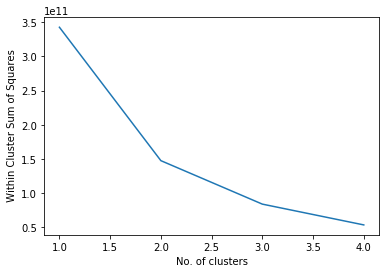

In [40]:


# KMeans clustering
squared_data=[]
for i in range(1,5):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=400, n_init=15)
    y = km.fit(kmeans_stuff)
    squared_data.append(y.inertia_)

    
plt.plot(range(1,5), squared_data)
plt.xlabel("No. of clusters")
plt.ylabel(" Within Cluster Sum of Squares")
plt.show()


C:\Users\pritishrawal\Anaconda3\Lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



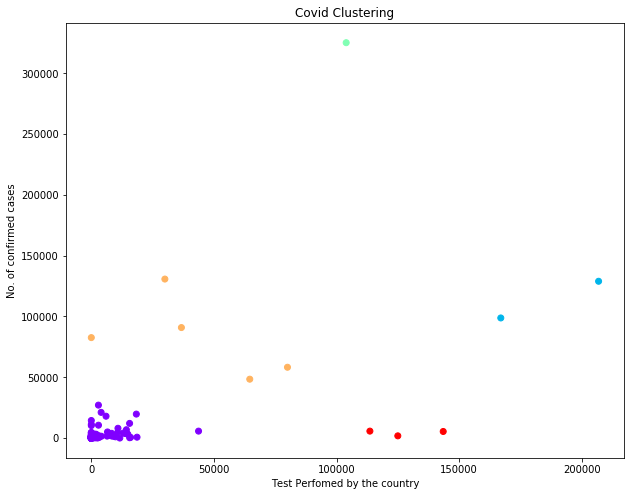

In [41]:

kmeans_covid = KMeans(n_clusters = 5, init='k-means++', max_iter=300, n_init=10)
y_kmeans = km.fit_predict(kmeans_stuff)


km = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = km.fit_predict(kmeans_stuff)


#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1

# New Dataframe called cluster
cluster = pd.DataFrame(y_kmeans1)
# Adding cluster to the Dataset1
kmeans_stuff['cluster'] = cluster

plt.figure(figsize=(10, 8))
plt.scatter(kmeans_stuff.iloc[:,0], kmeans_stuff.iloc[:,1],c=y_kmeans, cmap='rainbow')  # plot points with cluster dependent colors
plt.title('Covid Clustering')
plt.xlabel("Test Perfomed by the country")
plt.ylabel("No. of confirmed cases")
plt.savefig('clustering_result.png')
plt.show()


In [42]:
#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(kmeans_stuff.groupby('cluster').mean(),1))
kmeans_mean_cluster


,total_covid_19_tests,confirmed,deaths,recovered,active,inform_risk,inform_p2p_hazard_and_exposure_dimension,population_density,people_using_at_least_basic_sanitation_services,inform_vulnerability,inform_epidemic_vulnerability,prevalence_of_undernourishment,inform_lack_of_coping_capacity
cluster,,,,,,,,,,,,,
1,1721.9,1399.1,48.2,198.2,1095.9,3.5,4.1,190.5,67.4,3.4,4.7,11.1,4.2
2,186943.0,113860.0,8707.0,25257.5,79895.5,2.3,2.8,221.4,99.0,3.0,5.2,2.4,1.8
3,103945.0,325185.0,9267.0,16820.0,0.0,3.4,2.8,35.8,100.0,2.9,5.7,2.4,2.1
4,42273.6,82172.2,6374.4,30169.8,45628.0,3.2,3.5,137.9,94.2,3.0,5.1,4.1,2.6
5,127378.0,4291.3,30.0,418.7,3842.7,2.7,3.1,49.2,96.4,2.0,4.6,2.5,2.8


In [43]:
data_risk= pd.DataFrame()
data_risk["country"]=plotting_data["country_region"]
data_risk["Risk_Level"]=y_kmeans1
for group in range(1,6):
    countries=data_risk.loc[data_risk['Risk_Level']==group]
    listofcoutries= list(countries['country'])
    print("Group", group, ":", listofcoutries)

Group 1 : ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'Colombia', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Israel', 'Jamaica',